# Twitter Hashtag Recommendation System Using URL Information
Gilad Ben OR, Amir Olswang

In [1]:
import os
os.chdir("C:\\Users\\user\\Documents\\Recommender systems\\final project\\twitter")

import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pickle

import seaborn as sns
from tmodel import *
%matplotlib inline



In [2]:
# The length of the recommendation list
p = 2000

# HF-IHU (orignal paper)

In [ ]:
m_orig = tmodel(test_size = 0.1, seed=5, url_support=False)
m_orig.fit_the_model()
orig_result = m_orig.test_the_model(p)

In [ ]:
np.save ("orig_result_200000", orig_result)


# HF-IHU-URL 

In [3]:
m_url = tmodel(test_size = 0.1, seed=5, url_support=True)
m_url.fit_the_model()
url_result = m_url.test_the_model(p)

Data directory: data/200000


C:\Users\user\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2850: DtypeWarning: Columns (19,20,21,22,23) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):
C:\Users\user\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2850: DtypeWarning: Columns (25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):
C:\Users\user\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2850: DtypeWarning: Columns (45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,15

Finish fitting 185580 rows


In [4]:
np.save ("url_result_200000", url_result)


In [ ]:
# fit the model with URL, test without URLs
url_result_test_without_url = m_url.test_the_model(p, test_with_url=False)
np.save ("url_result_test_without_url_200000", url_result_test_without_url)


# HF-IHU-URL (All dataset tweets have URLs) 

In [ ]:
m_url_only = tmodel(test_size = 0.1, seed=5, url_support=True, url_only=True)
m_url_only.fit_the_model()
url_only_result = m_url_only.test_the_model(p)

In [ ]:
np.save ("url_only_result_200000", url_only_result)

# Analyze the results

In [5]:
orig_result = np.load("orig_result_200000.npy")
url_result = np.load ("url_result_200000.npy")
url_only_result = np.load ("url_only_result_200000.npy")


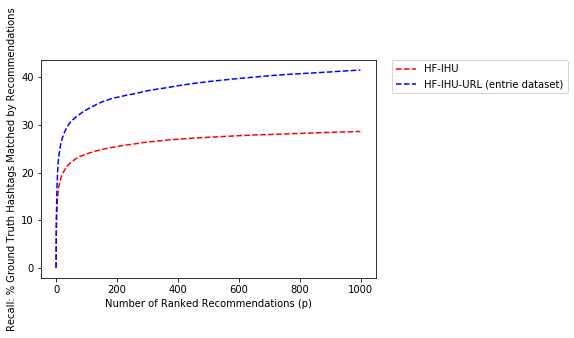

In [7]:
p_g = 1000 #range of p for the graph
p_axis = range (p_g)
plt.plot(p_axis, orig_result[0:p_g],'r--', label="HF-IHU")
plt.plot(p_axis, url_result[0:p_g],'b--',label="HF-IHU-URL (entrie dataset)")
plt.plot(p_axis, url_result_test_without_url[0:p_g],'g--',label="HF-IHU-URL (test without URL)")
plt.xlabel('Number of Ranked Recommendations (p)')
plt.ylabel ('Recall: % Ground Truth Hashtags Matched by Recommendations')
legend = plt.legend(loc='upper center', shadow=True, fontsize='x-large')
legend.get_frame().set_facecolor('#00FFCC')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.show()

# Learn without url test with url

In [ ]:
m_learn_without_url_test_with_url = tmodel(0.2, 1, url_support=True, learn_without_url_test_with_url=True)
m_learn_without_url_test_with_url.fit_the_model()
m_learn_without_url_test_with_url_result = m_learn_without_url_test_with_url.test_the_model(p)

In [ ]:
np.save ("m_learn_without_url_test_with_url_result_200000", m_learn_without_url_test_with_url_result)

In [ ]:
orig_result = np.load("orig_result_200000.npy")
url_result = np.load ("url_result_200000.npy")
url_only_result = np.load ("url_only_result_200000.npy")

In [ ]:
url_result_test_without_url = np.load ("url_result_test_without_url_200000.npy")
m_learn_without_url_test_with_url_result = np.load ("m_learn_without_url_test_with_url_result_200000.npy")


In [ ]:
p_g = 1000 #range of p for the graph
p_axis = range (p_g)
plt.plot(p_axis, orig_result[0:p_g],'r--', label="HF-IHU (Baseline)")
plt.plot(p_axis, url_result_test_without_url[0:p_g],'k--',label="Fitting only (Adding URL terms to the train set)")
plt.plot(p_axis, m_learn_without_url_test_with_url_result[0:p_g],'g--',label="Recommending only (Adding URL terms to the test set)")
plt.plot(p_axis, url_result[0:p_g],'b--',label="HF-IHU-URL")
plt.xlabel('Number of Ranked Recommendations (p)')
plt.ylabel ('Recall: % Ground Truth Hashtags Matched by Recommendations')
legend = plt.legend(loc='upper center', shadow=True, fontsize='x-large')
legend.get_frame().set_facecolor('#00FFCC')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.show()

In [ ]:
p_g = 50 #range of p for the graph
p_axis = range (p_g)
plt.plot(p_axis, orig_result[0:p_g],'r--', label="HF-IHU")
plt.plot(p_axis, url_result[0:p_g],'b--',label="HF-IHU-URL (entrie dataset)")
plt.plot(p_axis, url_only_result[0:p_g],'g--',label="HF-IHU-URL (url-only dataset)")
plt.xlabel('Number of Ranked Recommendations (p)')
plt.ylabel ('Recall: % Ground Truth Hashtags Matched by Recommendations')
legend = plt.legend(loc='upper center', shadow=True, fontsize='x-large')
legend.get_frame().set_facecolor('#00FFCC')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.show()